In [1]:
from heft import heft, gantt, dag_merge
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import importlib

In [2]:
comp_matrix_1 = heft.readCsvToNumpyMatrix('../test/canonicalgraph_task_exe_time.csv')
comm_matrix_1 = heft.readCsvToNumpyMatrix('../test/canonicalgraph_resource_BW.csv')
dag1 = heft.readDagMatrix('../test/canonicalgraph_task_connectivity.csv')

comp_matrix_2 = heft.readCsvToNumpyMatrix('../test/randomgraph_task_exe_time.csv')
comm_matrix_2 = heft.readCsvToNumpyMatrix('../test/randomgraph_resource_BW.csv')
dag2 = heft.readDagMatrix('../test/randomgraph_task_connectivity.csv')

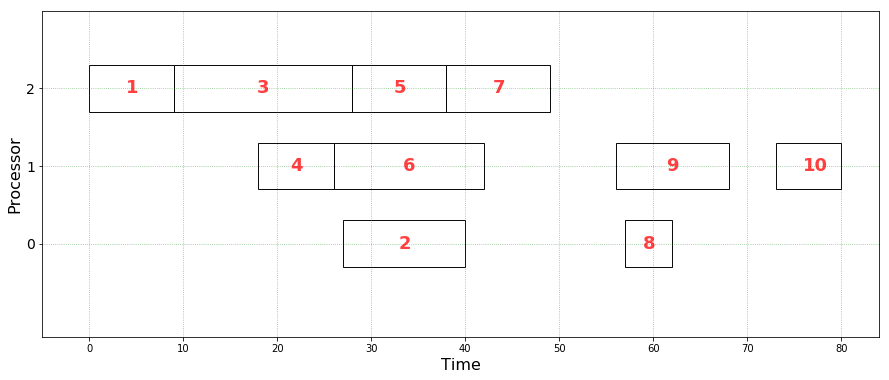

In [3]:
"""
Schedule the first graph with no existing schedules or time offset
"""
sched, _, _ = heft.schedule_dag(dag1, 
                                communication_matrix=comm_matrix_1, 
                                computation_matrix=comp_matrix_1)
gantt.showGanttChart(sched)

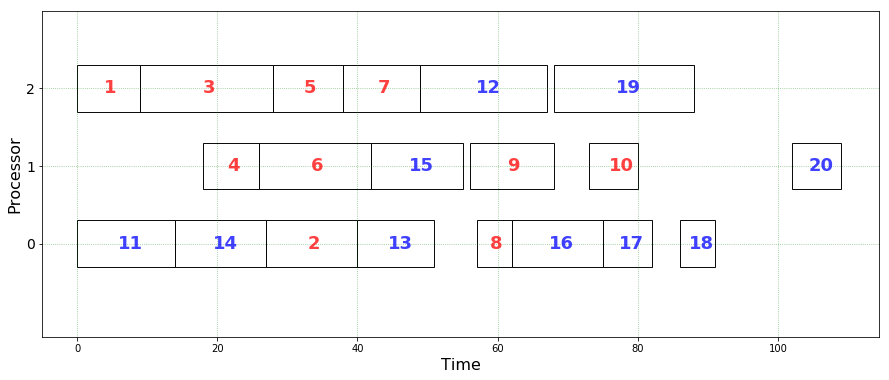

In [4]:
"""
Schedule the same task set again around the constraints of an existing schedule by passing in the previous
list of processor schedules.
"""
sched, _, _ = heft.schedule_dag(dag1, 
                                communication_matrix=comm_matrix_1, 
                                computation_matrix=comp_matrix_1, 
                                proc_schedules=sched, 
                                time_offset=0)
gantt.showGanttChart(sched)

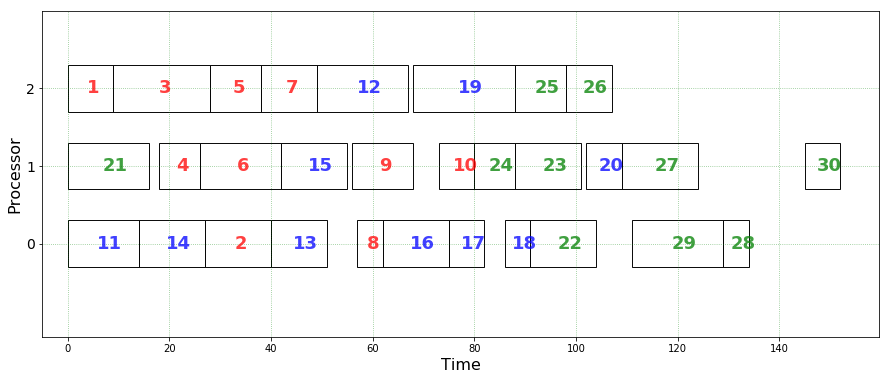

In [5]:
"""
Schedule the same task a third time around the constraints of an existing schedule by passing in the previous
list of processor schedules.
"""
sched, _, _ = heft.schedule_dag(dag1, 
                                communication_matrix=comm_matrix_1, 
                                computation_matrix=comp_matrix_1, 
                                proc_schedules=sched, 
                                time_offset=0)
gantt.showGanttChart(sched)

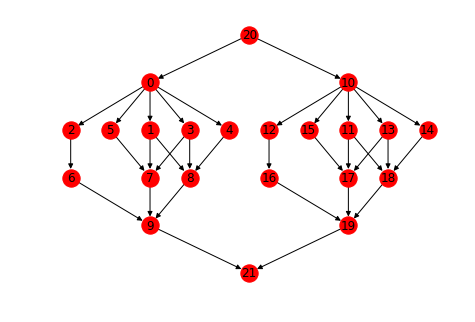

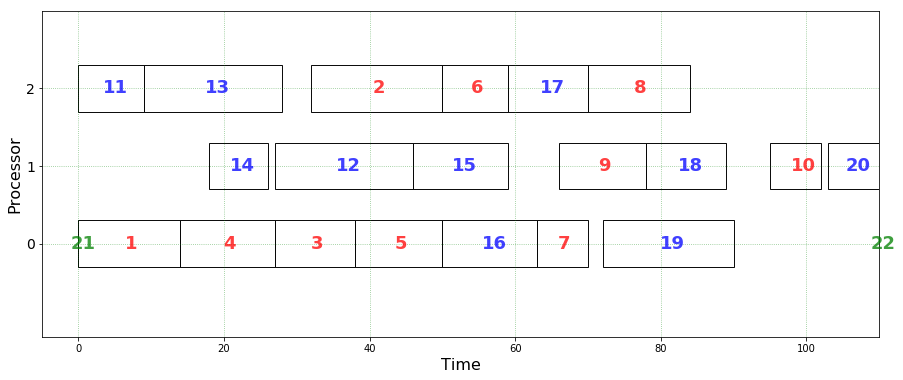

In [6]:
"""
Schedule the first graph twice instead by merging the two dags together a priori
"""
combined_dag = dag_merge.merge_dags(dag1, dag1, merge_method=dag_merge.MergeMethod.COMMON_ENTRY_EXIT)
nx.draw(combined_dag, pos=nx.nx_pydot.graphviz_layout(combined_dag, prog='dot'), with_labels=True)

expanded_comp_matrix_1 = np.vstack((comp_matrix_1, comp_matrix_1, np.zeros((2, comp_matrix_1.shape[1]))))

sched, _, _ = heft.schedule_dag(combined_dag,
                               communication_matrix=comm_matrix_1,
                               computation_matrix=expanded_comp_matrix_1)
gantt.showGanttChart(sched)

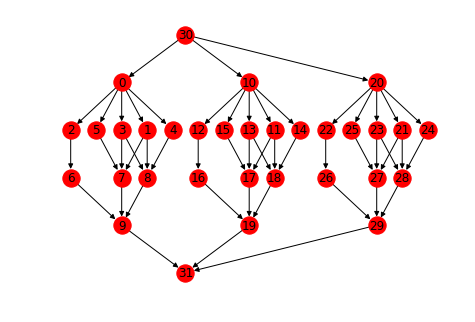

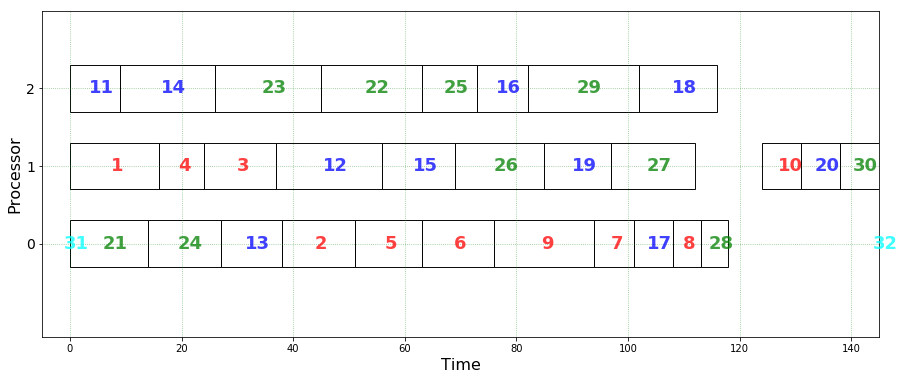

In [7]:
"""
Schedule 3 of the original graph at once now
"""
combined_dag = dag_merge.merge_dags(dag1, dag1, dag1, merge_method=dag_merge.MergeMethod.COMMON_ENTRY_EXIT)
nx.draw(combined_dag, pos=nx.nx_pydot.graphviz_layout(combined_dag, prog='dot'), with_labels=True)

expanded_comp_matrix_1 = np.vstack((comp_matrix_1, comp_matrix_1, comp_matrix_1, np.zeros((2, comp_matrix_1.shape[1]))))

sched, _, _ = heft.schedule_dag(combined_dag,
                               communication_matrix=comm_matrix_1,
                               computation_matrix=expanded_comp_matrix_1)
gantt.showGanttChart(sched)

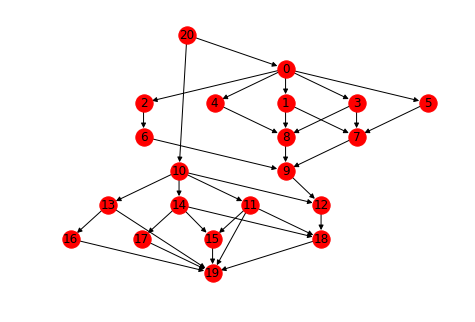

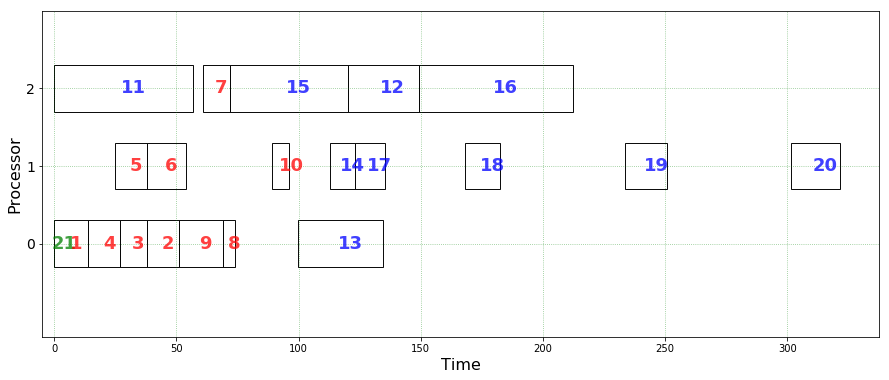

In [8]:
"""
Use Ranking-based merge
"""
combined_dag = dag_merge.merge_dags(dag1, dag2, merge_method=dag_merge.MergeMethod.RANKING_BASED, computation_matrix=comp_matrix_1, communication_matrix=comm_matrix_1, minimize_relabeling=True)
nx.draw(combined_dag, pos=nx.nx_pydot.graphviz_layout(combined_dag, prog='dot'), with_labels=True)

expanded_comp_matrix_1 = np.vstack((comp_matrix_1, comp_matrix_2, np.zeros((2, comp_matrix_1.shape[1]))))

sched, _, _ = heft.schedule_dag(combined_dag,
                               communication_matrix=comm_matrix_1,
                               computation_matrix=expanded_comp_matrix_1)
gantt.showGanttChart(sched)

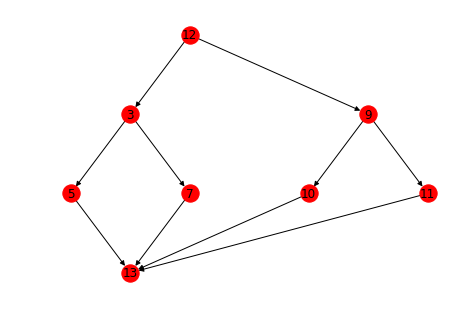

In [9]:
"""
Testing with the minimize_relabeling kwarg to help keep node relabeling as low as possible
"""
tempdag = nx.DiGraph()
tempdag2 = nx.DiGraph()

tempdag.add_node(3); tempdag.add_node(5); tempdag.add_node(7);
tempdag.add_edge(3, 5); tempdag.add_edge(3, 7);

tempdag2.add_node(1); tempdag2.add_node(2); tempdag2.add_node(3);
tempdag2.add_edge(1, 2); tempdag2.add_edge(1, 3);

combined_dag = dag_merge.merge_dags(tempdag, tempdag2, merge_method=dag_merge.MergeMethod.COMMON_ENTRY_EXIT, minimize_relabeling=True)
nx.draw(combined_dag, pos=nx.nx_pydot.graphviz_layout(combined_dag, prog='dot'), with_labels=True)

In [10]:
importlib.reload(dag_merge)

<module 'heft.dag_merge' from '/localhome/jmack2545/rcl/DASH-SoC/heft/heft/dag_merge.py'>